In [704]:
import importlib
import seaborn as sns

In [705]:
import numpy as np
import matplotlib.pyplot as plt
import helpers

In [706]:
importlib.reload(helpers)

<module 'helpers' from '/Users/daniildubinin/Documents/lecture-notes/MA1/ML/MLProject1/helpers.py'>

# First Filter (Useless Feautures)

In [613]:
fields_to_drop = ["_STATE","FMONTH","IDATE","IMONTH",
    "IDAY","IYEAR","DISPCODE","SEQNO","_PSU",
    "CTELENUM","PVTRESD1","STATERES","CELLFON3",
    "LADULT","NUMADULT","NUMMEN","NUMWOMEN",
    "CTELNUM1","CELLFON2","CADULT","PVTRESD2",
    "CSTATE","LANDLINE","HHADULT","HLTHPLN1",
    "MARITAL","EDUCA","RENTHOM1","NUMHHOL2",
    "NUMPHON2","CPDEMO1","VETERAN3","EMPLOY1",
    "CHILDREN","INCOME2","INTERNET","MEDCOST",
    "USEEQUIP","BLIND","DECIDE", "DIFFWALK",
    "DIFFDRES","DIFFALON","SEATBELT", "IMFVPLAC", 
    "CAREGIV1","CRGVREL1","CRGVLNG1","CRGVHRS1",
    "CRGVPRB1","CRGVPERS","CRGVHOUS","CRGVEXPT",
    "VINOCRE2","VIINSUR2","CDHELP","SXORIENT", 
    "TRNSGNDR","RCSGENDR", "RCSRLTN2", "QSTVER",
    "QSTLANG","MSCODE",'_STSTR','_STRWT',
    '_RAWRAKE','_WT2RAKE','_CHISPNC','_DUALUSE',
    '_DUALCOR','_LLCPWT','_HCVU651','_DRDXAR1',
    '_PRACE1','_MRACE1','_HISPANC','_RACE',
    '_RACEG21','_RACEGR3','_RACE_G1','_CHLDCNT',
    '_EDUCAG','_INCOMG','_RFSEAT2','_RFSEAT3']


# Load dataset

In [680]:
train_dict, test_dict, y_train, train_ids, test_ids = helpers.load_csv_data('data/dataset')

# Remove feautures with >70% missing values

In [681]:
train_dict, test_dict = helpers.filter_features_by_nan(train_dict,test_dict,threshold=70)

Keeping 200 features


# Drop "fields_to drop"

In [682]:
train_clean, test_clean= helpers.drop_and_keep_features(train_dict, test_dict, fields_to_drop)

In [683]:
len(train_clean)

130

# Dictionary with feautures where 7, 9 etc with "refused" or "don't know" answers

In [684]:
invalid_dict = {
    (7,9): ['GENHLTH','PERSDOC2','CHECKUP1',
            'BPHIGH4','BPMEDS','BLOODCHO',
            'CHOLCHK','TOLDHI2','CVDSTRK3',
            'ASTHMA3','CHCSCNCR','CHCOCNCR',
            'CHCCOPD1','HAVARTH3','ADDEPEV2',
            'CHCKIDNY','DIABETE3','QLACTLM2',
            'SMOKE100','SMOKDAY2','USENOW3',
            'EXERANY2','CHOLCHK','DRNKANY5',
            '_RFBMI5','_CHOLCHK','_RFSMOK3',
            'PAMISS1_','PNEUVAC3','FLUSHOT6'],
    (77,99): ['PHYSHLTH','MENTHLTH','POORHLTH',
              'DRNK3GE5','MAXDRNKS','AVEDRNK2',
              'EXRACT11'],
    (777,999): ['ALCDAY5','FRUITJU1','FRUIT1',
                'FVBEANS','FVGREEN','FVORANG',
                'VEGETAB1','EXEROFT1','EXERHMM1','MAXVO2_',
                'FC60_'],
    (7777,9999): ['WEIGHT2','HEIGHT3'],
    (9): ['_VEGLT1','_TOTINDA','_PACAT1',
          '_PAINDX1','_PA150R2', '_PA300R2',
          '_PA30021', '_PASTRNG', '_PAREC1',
          '_PASTAE1', '_FLSHOT6', '_LMTACT1',
          '_LMTWRK1','_LMTSCL1','_PNEUMO2',
          '_AIDTST3', '_RFHLTH','_RFHYPE5',
          '_LTASTH1','_CASTHM1', '_ASTHMS1',
          '_SMOKER3','_RFBING5','_RFDRHV5',
          '_FRTLT1','_RFCHOL'],
    (99): ['PAFREQ1_', 'PAFREQ2_', 'STRFREQ_'],

    (99900): ['_DRNKWEK'],
    (14): ['_AGEG5YR'],
    (99999): ['WTKG3'],
    (900): ['DROCDY3','DROCDY3_'],
    (3): ['_AGE65YR']

    
}

# Replace 7,9 etc with nans

In [685]:
helpers.replace_invalid_with_nan_inplace([train_clean,test_clean], invalid_dict)

In [686]:
n_rows = len(next(iter(train_clean.values())))  # number of samples

for name, values in train_clean.items():
    if name in set(list(train_clean.keys())):
        nan_pct = np.isnan(values).sum() / n_rows * 100
        print(f'{name}: {nan_pct}')

GENHLTH: 0.27062032395203195
PHYSHLTH: 2.166181602084508
MENTHLTH: 1.6331692748411477
POORHLTH: 49.80175842260046
PERSDOC2: 0.406235238545111
CHECKUP1: 1.3549301354625383
BPHIGH4: 0.27976290246392493
BPMEDS: 59.89912688375212
BLOODCHO: 2.114983162417907
CHOLCHK: 14.660429396437442
TOLDHI2: 14.117360232831
CVDSTRK3: 0.224602678775504
ASTHMA3: 0.2998765751900894
CHCSCNCR: 0.2486781355234888
CHCOCNCR: 0.19930821155926676
CHCCOPD1: 0.4714522985966142
HAVARTH3: 0.5738491779298155
ADDEPEV2: 0.44189129474149363
CHCKIDNY: 0.29774330687064776
DIABETE3: 0.14597650357322445
SEX: 0.0
WEIGHT2: 7.00961494506834
HEIGHT3: 3.4622944824538684
QLACTLM2: 2.78787694089323
SMOKE100: 3.9465463909671326
SMOKDAY2: 58.39761073948223
USENOW3: 3.792036814116141
ALCDAY5: 4.868118304965944
AVEDRNK2: 52.88158837064013
DRNK3GE5: 52.84837033538026
MAXDRNKS: 53.748304813567586
FRUITJU1: 8.644612735611867
FRUIT1: 8.206073719658068
FVBEANS: 8.954241394547974
FVGREEN: 8.50046474774102
FVORANG: 8.825026284913221
VEGETAB1: 

# Drop feautures with > 30 nan's (à contrôler les feautures qui ont été drop)

## Feautures with >20% nan's

In [687]:
n_rows = len(next(iter(train_clean.values())))  # number of samples
feautures_20 = {}

for name, values in train_clean.items():
    if name in set(list(train_clean.keys())):
        nan_pct = np.isnan(values).sum() / n_rows * 100
        if nan_pct >30:
            feautures_20[name] = round(float(nan_pct),2)
            print(f'{name}: {nan_pct}')

POORHLTH: 49.80175842260046
BPMEDS: 59.89912688375212
SMOKDAY2: 58.39761073948223
AVEDRNK2: 52.88158837064013
DRNK3GE5: 52.84837033538026
MAXDRNKS: 53.748304813567586
EXRACT11: 33.13483779541957
EXEROFT1: 33.90586191658921
EXERHMM1: 34.678714553461226
EXRACT21: 33.428314565651334
EXEROFT2: 55.23976412147439
EXERHMM2: 55.282124735246164
LMTJOIN3: 69.15050207993662
ARTHDIS2: 69.1919484358572
ARTHSOCL: 69.23888033888491
JOINPAIN: 69.81516753775124
FLSHTMY2: 56.916513020555556
METVL11_: 33.13483779541957
METVL21_: 34.261812973318904
ACTIN11_: 33.84948268243254
ACTIN21_: 34.95451567190333
PADUR1_: 34.678714553461226
PADUR2_: 56.27043747238179
PAFREQ1_: 33.9101284532281
PAFREQ2_: 55.74809148673564
_MINAC11: 35.09287336004998
_MINAC21: 35.60150547792829
PAMIN11_: 35.76424337543999
PAMIN21_: 36.26678044097704
PA1MIN_: 34.39407560912429
PAVIG11_: 34.676276532524724
PAVIG21_: 35.65971322778734
PA1VIGM_: 34.06920931933503
_FLSHOT6: 68.68026879180825
_PNEUMO2: 69.6634007344538


## Drop them

In [688]:
train_clean, test_clean = helpers.filter_features_by_nan(train_clean,test_clean,threshold=30)

Keeping 95 features


# percentage of missing values with left feautures

In [689]:
n_rows = len(next(iter(train_clean.values())))  # number of samples

for name, values in train_clean.items():
    if name in set(list(train_clean.keys())):
        nan_pct = np.isnan(values).sum() / n_rows * 100
        print(f'{name}: {nan_pct}')

GENHLTH: 0.27062032395203195
PHYSHLTH: 2.166181602084508
MENTHLTH: 1.6331692748411477
PERSDOC2: 0.406235238545111
CHECKUP1: 1.3549301354625383
BPHIGH4: 0.27976290246392493
BLOODCHO: 2.114983162417907
CHOLCHK: 14.660429396437442
TOLDHI2: 14.117360232831
CVDSTRK3: 0.224602678775504
ASTHMA3: 0.2998765751900894
CHCSCNCR: 0.2486781355234888
CHCOCNCR: 0.19930821155926676
CHCCOPD1: 0.4714522985966142
HAVARTH3: 0.5738491779298155
ADDEPEV2: 0.44189129474149363
CHCKIDNY: 0.29774330687064776
DIABETE3: 0.14597650357322445
SEX: 0.0
WEIGHT2: 7.00961494506834
HEIGHT3: 3.4622944824538684
QLACTLM2: 2.78787694089323
SMOKE100: 3.9465463909671326
USENOW3: 3.792036814116141
ALCDAY5: 4.868118304965944
FRUITJU1: 8.644612735611867
FRUIT1: 8.206073719658068
FVBEANS: 8.954241394547974
FVGREEN: 8.50046474774102
FVORANG: 8.825026284913221
VEGETAB1: 9.323296813811389
EXERANY2: 8.55349170311
STRENGTH: 8.730248221006597
FLUSHOT6: 10.013561491459308
PNEUVAC3: 17.663766437594283
HIVTST6: 9.776463955384216
_RFHLTH: 0.2

In [ ]:
new_to_drop = [
'PHYSHLTH', 'MENTHLTH', 'BPHIGH4',
'_CHOLCHK', 'BLOODCHO', 'CHOLCHK',
'TOLDHI2', '_CASTHM1', '_LTASTH1',
'ASTHMA3', 'HIVTST6', '_AGE80', '_LMTSCL1' , 'WEIGHT2',
'HEIGHT3','HTIN4','HTM4','WTKG3','_AGE_G',
'_BMI5','_RFBMI5','QLACTLM2',
'EXERANY2','STRENGTH',
'STRFREQ_','PAMISS1_', '_PA150R2',
'_PA30021','_PASTRNG',
'_PASTAE1','_LMTWRK1', 'SMOKE100',
'USENOW3','_RFSMOK3','ALCDAY5',
'DRNKANY5', 'DROCDY3_','_RFDRHV5',
'_MISFRTN','_MISVEGN',
 '_FRTRESP', '_VEGRESP','_FRUITEX','_VEGETEX',
 'GENHLTH', 'FRUITJU1', 'FRUIT1', 'FVBEANS',
 'FVGREEN', 'FVORANG','VEGETAB1',
 '_FRUTSUM','_VEGESUM','_FRT16','_VEG23',
 '_VEGLT1','_FRTLT1','_AGE65YR', 'VEGEDA1_',
 'MAXVO2_', '_TOTINDA','_PA300R2'
]
#comment: dropped MAXVO2_ because same as FC60_

In [691]:
train_clean, test_clean = helpers.drop_and_keep_features(train_clean, test_clean, new_to_drop)

In [692]:
len(train_clean)

34

In [693]:
import pandas as pd

In [694]:
# Convert to DataFrame
df = pd.DataFrame(train_clean)

# Drop rows with NaNs (like in your example)
#df_clean = df.dropna()
df['y'] = pd.Series(y_train)

# separate y=1, y=-1

In [695]:
mask_pos = (y_train == 1)
mask_neg = (y_train == -1)

# split features
features_pos = {k: v[mask_pos] for k, v in train_clean.items()}
features_neg = {k: v[mask_neg] for k, v in train_clean.items()}

# split targets
y_pos = y_train[mask_pos]
y_neg = y_train[mask_neg]


In [696]:
print(f'y = -1: {len(y_neg)}')
print(f'y = 1: {len(y_pos)}')

y = -1: 299160
y = 1: 28975


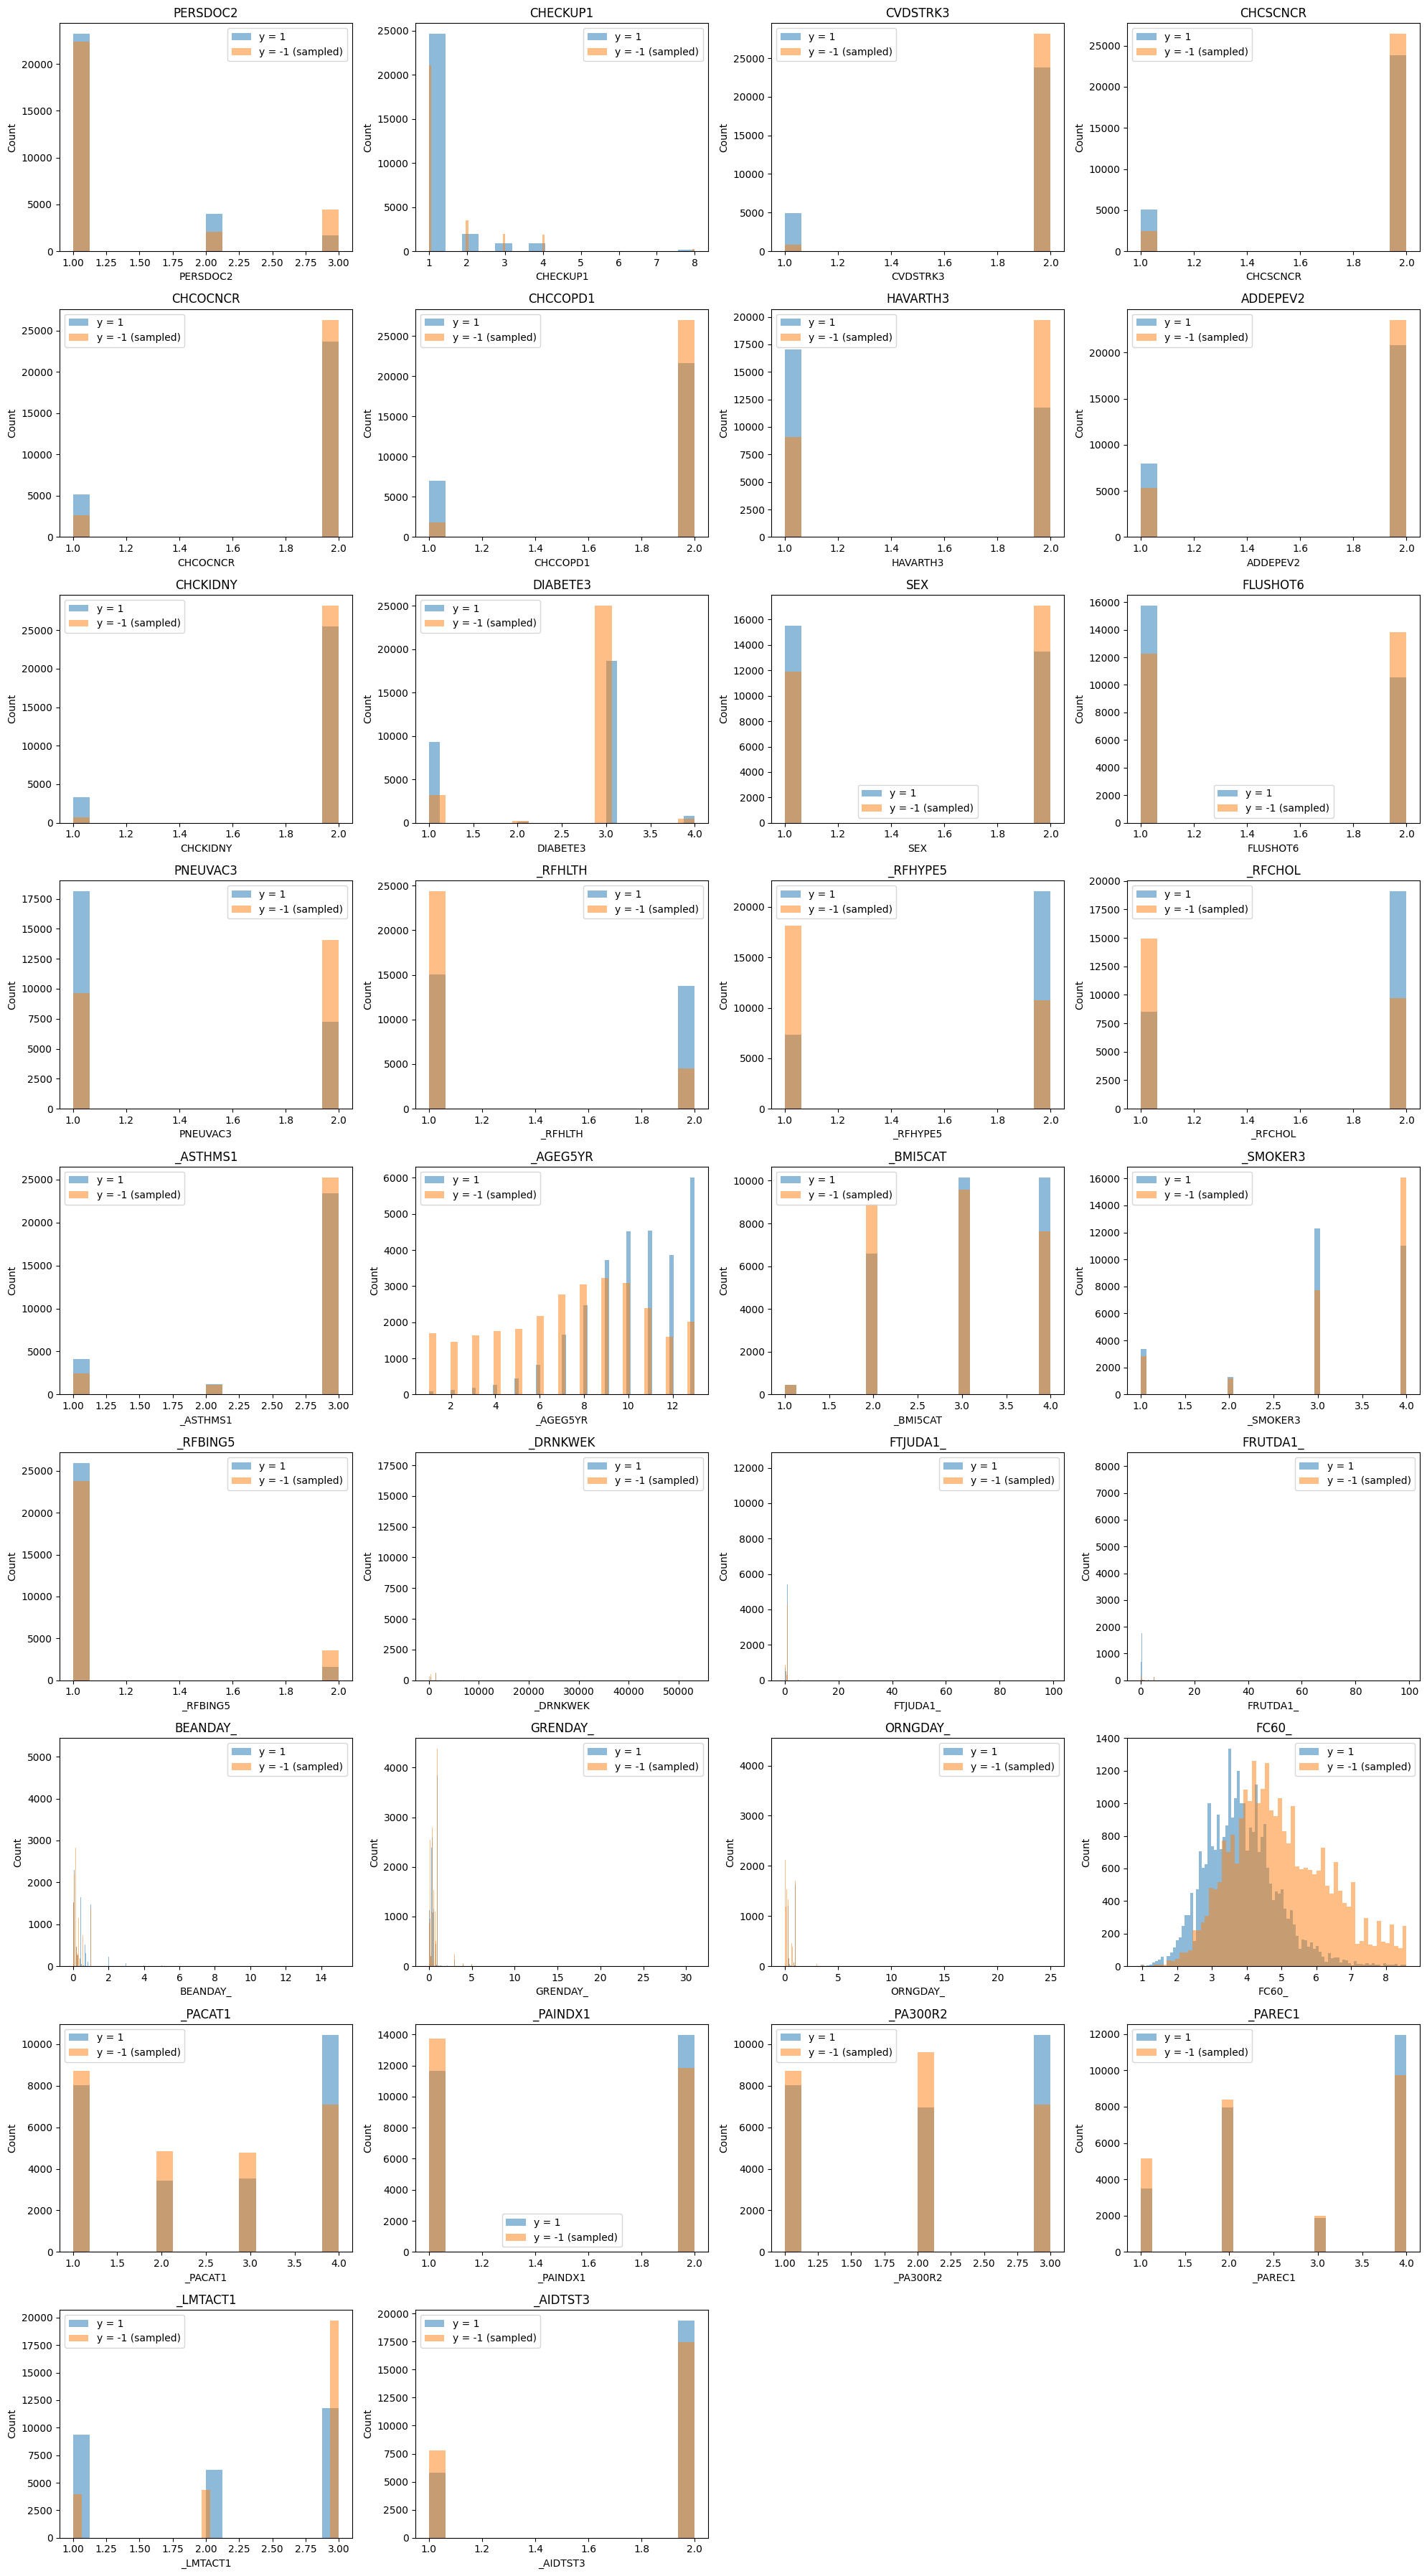

In [697]:
helpers.distribution_plotter(y_train,train_clean)

In [698]:
continuous_feautures = ['_DRNKWEK', 'FTJUDA1_', 'FRUTDA1_', 'BEANDAY_', 'GRENDAY_', 'ORNGDAY_', 'FC60_']

In [699]:
# First condition: values 1 or 2 → set to 1
train_clean['PERSDOC2'][np.where((train_clean['PERSDOC2'] == 1) | (train_clean['PERSDOC2'] == 2))] = 1

# Second condition: values 3 → set to 2
train_clean['PERSDOC2'][np.where(train_clean['PERSDOC2'] == 3)] = 2

train_clean['CHECKUP1'][np.where(
    (train_clean['CHECKUP1'] == 2) | 
    (train_clean['CHECKUP1'] == 3) | 
    (train_clean['CHECKUP1'] == 4) | 
    (train_clean['CHECKUP1'] == 8)
)] = 2

In [700]:
import pandas as pd

# Training

In [701]:
continuous_features = ['_DRNKWEK', 'FTJUDA1_', 'FRUTDA1_', 'BEANDAY_', 'GRENDAY_', 'ORNGDAY_','MAXVO2_', 'FC60_']
indices_to_winsorize = [k for k in train_clean if k in continuous_features]

# separate keys
winsor_keys = [k for k in train_clean if k in continuous_features]
other_keys  = [k for k in train_clean if k not in continuous_features]

# stack all features into a big matrix to create NaN mask
X_train_all = np.column_stack(list(train_clean.values()))
mask = ~np.isnan(X_train_all).any(axis=1)

# clean y and each feature group
y_train_clean = y_train[mask]

# build X arrays for each group (already NaN-cleaned)
X_train_winsor = np.column_stack([train_clean[k][mask] for k in winsor_keys])
X_train_other  = np.column_stack([train_clean[k][mask] for k in other_keys])

"""

feature_names  = list(train_clean.keys())

interaction_pairs = [
    #('_AGEG5YR', 'SEX'),
    #('_SMOKER3', 'SEX'),
    #('_SMOKER3','_AGEG5YR')
    #('_PACAT1', '_SMOKER3'),
]
#interaction_pairs=[]

# Map feature names to column indices
feat_to_idx = {f: i for i, f in enumerate(feature_names)}

# Compute the interaction columns
interaction_cols = []
if interaction_pairs:
    for f1, f2 in interaction_pairs:
        i, j = feat_to_idx[f1], feat_to_idx[f2]
        inter = (X_train_all[mask][:, i] * X_train_all[mask][:, j]).reshape(-1, 1)
        interaction_cols.append(inter)

#X_train_clean = X_train_all[mask]

if interaction_cols:
    X_train_other = np.column_stack([X_train_other] + interaction_cols)
    feature_names += [f"{f1}*{f2}" for f1, f2 in interaction_pairs]
"""

'\n\nfeature_names  = list(train_clean.keys())\n\ninteraction_pairs = [\n    #(\'_AGEG5YR\', \'SEX\'),\n    #(\'_SMOKER3\', \'SEX\'),\n    #(\'_SMOKER3\',\'_AGEG5YR\')\n    #(\'_PACAT1\', \'_SMOKER3\'),\n]\n#interaction_pairs=[]\n\n# Map feature names to column indices\nfeat_to_idx = {f: i for i, f in enumerate(feature_names)}\n\n# Compute the interaction columns\ninteraction_cols = []\nif interaction_pairs:\n    for f1, f2 in interaction_pairs:\n        i, j = feat_to_idx[f1], feat_to_idx[f2]\n        inter = (X_train_all[mask][:, i] * X_train_all[mask][:, j]).reshape(-1, 1)\n        interaction_cols.append(inter)\n\n#X_train_clean = X_train_all[mask]\n\nif interaction_cols:\n    X_train_other = np.column_stack([X_train_other] + interaction_cols)\n    feature_names += [f"{f1}*{f2}" for f1, f2 in interaction_pairs]\n'

In [702]:
(y_train == 1).astype(int)

array([0, 0, 0, ..., 0, 0, 0], shape=(328135,))

In [ ]:
res = helpers.cross_validation(
    y_train_clean,
    X_train_other,
    X_train_winsor,
    k_fold=5,
    method='undersample',    # ← use weighted instead of undersample
    lambda_=0.001,
    max_iters=1000,
    gamma=0.1,
    proba=0.3)
## y, x, k_fold, method, lambda_, max_iters, gamma

/Users/daniildubinin/Documents/lecture-notes/MA1/ML/MLProject1/helpers.py:300: RuntimeWarning: divide by zero encountered in matmul
  z = tx @ w
/Users/daniildubinin/Documents/lecture-notes/MA1/ML/MLProject1/helpers.py:300: RuntimeWarning: overflow encountered in matmul
  z = tx @ w
/Users/daniildubinin/Documents/lecture-notes/MA1/ML/MLProject1/helpers.py:300: RuntimeWarning: invalid value encountered in matmul
  z = tx @ w
/Users/daniildubinin/Documents/lecture-notes/MA1/ML/MLProject1/helpers.py:305: RuntimeWarning: divide by zero encountered in matmul
  grad = tx.T @ (sample_weights * (pred - y)) / N + lambda_ * w
/Users/daniildubinin/Documents/lecture-notes/MA1/ML/MLProject1/helpers.py:305: RuntimeWarning: overflow encountered in matmul
  grad = tx.T @ (sample_weights * (pred - y)) / N + lambda_ * w
/Users/daniildubinin/Documents/lecture-notes/MA1/ML/MLProject1/helpers.py:305: RuntimeWarning: invalid value encountered in matmul
  grad = tx.T @ (sample_weights * (pred - y)) / N + lam

Fold 1/5 → test loss: 0.2915, train loss:1.0069 prec: 0.344, rec: 0.517, acc: 0.855, f1: 0.413
Fold 2/5 → test loss: 0.2928, train loss:0.9982 prec: 0.338, rec: 0.506, acc: 0.854, f1: 0.405
Fold 3/5 → test loss: 0.2943, train loss:0.9973 prec: 0.337, rec: 0.496, acc: 0.854, f1: 0.401
Fold 4/5 → test loss: 0.2888, train loss:1.0147 prec: 0.346, rec: 0.521, acc: 0.856, f1: 0.416
Fold 5/5 → test loss: 0.2917, train loss:1.0021 prec: 0.336, rec: 0.498, acc: 0.854, f1: 0.401

=== Cross-Validation Summary ===
Avg train loss: 1.0038
Avg test loss: 0.2918
Avg precision: 0.340
Avg recall:    0.508
Avg accuracy:  0.855
Avg f1:        0.407


In [ ]:
helpers.cross_validation(
    y_train_clean,
    X_train_other,
    X_train_winsor,
    k_fold=5,
    method='weighted',    # ← use weighted instead of undersample
    lambda_=0.01,
    max_iters=1000,
    gamma=0.1,
    proba=0.3)

# Create y's on test set

In [548]:
w_final = np.mean(np.stack(res['models']), axis=0)

In [550]:
# assuming test_clean has the same structure as train_clean
X_test_all = np.column_stack(list(test_clean.values()))
mask_test = ~np.isnan(X_test_all).any(axis=1)

X_test_winsor = np.column_stack([test_clean[k][mask_test] for k in winsor_keys])
X_test_other  = np.column_stack([test_clean[k][mask_test] for k in other_keys])

# Apply same transformation as training
X_test_winsor = np.log1p(np.clip(X_test_winsor, a_min=0, a_max=None))
X_test = np.column_stack([X_test_winsor, X_test_other])

z_test = X_test @ w_final
y_test_pred_prob = 1 / (1 + np.exp(-z_test))
y_test_pred = (y_test_pred_prob >= 0.3).astype(int)

/var/folders/68/g1jncml17495jn3f_j8t3g1h0000gn/T/ipykernel_42669/945568344.py:12: RuntimeWarning: divide by zero encountered in matmul
  z_test = X_test @ w_final
/var/folders/68/g1jncml17495jn3f_j8t3g1h0000gn/T/ipykernel_42669/945568344.py:12: RuntimeWarning: overflow encountered in matmul
  z_test = X_test @ w_final
/var/folders/68/g1jncml17495jn3f_j8t3g1h0000gn/T/ipykernel_42669/945568344.py:12: RuntimeWarning: invalid value encountered in matmul
  z_test = X_test @ w_final


In [552]:
unique, counts = np.unique(y_test_pred, return_counts=True)
counts_dict = dict(zip(unique, counts))
print(counts_dict)

{np.int64(0): np.int64(53330), np.int64(1): np.int64(9271)}
